In [1]:
import pathlib
import pickle
import numpy as np
# from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd

def get_acc(data):
    total = data['tp'] + data['tn'] + data['fp'] + data['fn']
    acc = (data['tp'] + data['tn']) / total
    return acc

def get_fpr(data):
    fpr = data['fp'] / (data['fp'] + data['tn'])
    return fpr

def get_fnr(data):
    fnr = data['fn'] / (data['fn'] + data['tp'])
    return fnr

def get_tpr(data):
    tpr = data['tp'] / (data['tp'] + data['fn'])
    return tpr

In [2]:
results = None
name = 'testing_results.bin'
results = pickle.load(open(name,'rb'))

# name = 'other_testing_results.bin'
# other_results = pickle.load(open(name,'rb'))
# for result in other_results:
#     results[result] = other_results[result]
for result in results:
    print(result)

main
steganogan
no_distortion_training
no_mask_residual
no_channel_coding
no_evaluation_tuning
stegastamp
rw_distortion


In [3]:
for result in results:
    if(result == 'main'):
        results[result]['linestyle'] = 'solid'
    else:
        results[result]['linestyle'] = 'dotted'

In [4]:
def get_cutoff(fpr, tpr, thresholds):
    i = np.arange(len(tpr))
    roc = pd.DataFrame({'fpr':pd.Series(fpr,index=i), 'tpr':pd.Series(tpr,index=i), 'tf': pd.Series(tpr-(1-fpr),index=i), 'threshold': pd.Series(thresholds, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['fpr']), list(roc_t['tpr'])

In [5]:
# table_data = [['Model','Perspective Warp','Motion Blur','Gaussian Blur','Gaussian','Color Manipulation','JPEG Compression']]
# # table_data = [['Model','Perspective Warp','Motion Blur','Gaussian Blur']]

# for result in results:
#     rw_score = results[result]['rw_score']
#     table_data.append([result ,'%.4f' % rw_score['perspective_warp'], '%.4f' % rw_score['motion_blur'], '%.4f' % rw_score['gaussian_blur'], 
#     '%.4f' % rw_score['gaussian'], '%.4f' % rw_score['color_manipulation'], '%.4f' % rw_score['jpeg_compression']])

# # table_data.sort(key = lambda table_data: table_data[1], reverse=True)

# fig, ax = plt.subplots()


# table = ax.table(cellText=table_data, loc='center')
# table.set_fontsize(14)
# table.scale(3,4)
# ax.axis('off')

# # plt.figure(figsize=(16,8))
# # plt.ylabel('AUC')
# # plt.xlabel('Model')
# # plt.title(f'AUC Score Graph')
# # plt.bar(models, auc_data)
# # plt.legend()
# plt.savefig(f'results/results_test.png')
# plt.show()

In [6]:
# naming
names = {
    'main': 'Facestamp (Ours)',
    'main_overtrain': 'Facestamp (Ours)',
    'no_mask_residual': 'Facestamp (No Masking)',
    'no_distortion_training': 'Facestamp (No Distortion Training)',
    'no_channel_coding': 'Facestamp (No Channel Coding)',
    'rw_distortion': 'Facestamp (Real-world Training)',
    'no_evaluation_tuning': 'Facestamp (No Evaluation Tuning)',
    'stegastamp': 'StegaStamp',
    'steganogan_residual': 'SteganoGAN (Residual)',
    'steganogan_dense': 'SteganoGAN (Dense)',
    'steganogan_basic': 'SteganoGAN (Basic)',
    'steganogan': 'SteganoGAN (Residual)'
}

for result in results:
    results[result]['name'] = names[result]

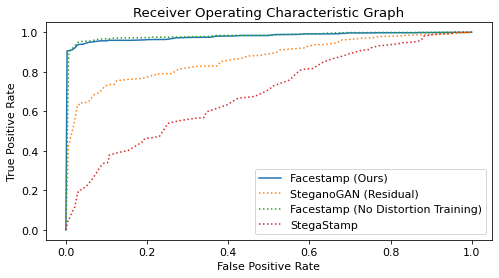

In [7]:
excludes = ['no_evaluation_tuning', 'no_channel_coding', 'no_mask_residual', 'rw_distortion']

plt.figure(figsize=(8,4))
# plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size': 11})
# plt.rcParams.update({'font.size': 16})

for result in results:
    excluded = False
    for exclude in excludes:
        if(result == exclude):
            excluded = True
    if(excluded):
        continue
    preswap = results[result]['preswap_match']
    swap = results[result]['faceswap_swap_match']
    preswap_true = [1 for _ in range(len(preswap))]
    swap_true = [0 for _ in range(len(swap))]
    gt = preswap_true + swap_true
    prob = preswap + swap
    auc = metrics.roc_auc_score(gt, prob)
    fpr, tpr, thresholds = metrics.roc_curve(gt, prob)
    linestyle = results[result]['linestyle']
    linewidth = 1.5
    name = results[result]['name']
    plt.plot(fpr, tpr, label=f'{name}', linestyle=linestyle)

plt.ylabel('True Positive Rate', )
plt.xlabel('False Positive Rate')
plt.title(f'Receiver Operating Characteristic Graph')
plt.legend()
plt.savefig(f'results/results_roc.png')

plt.show()

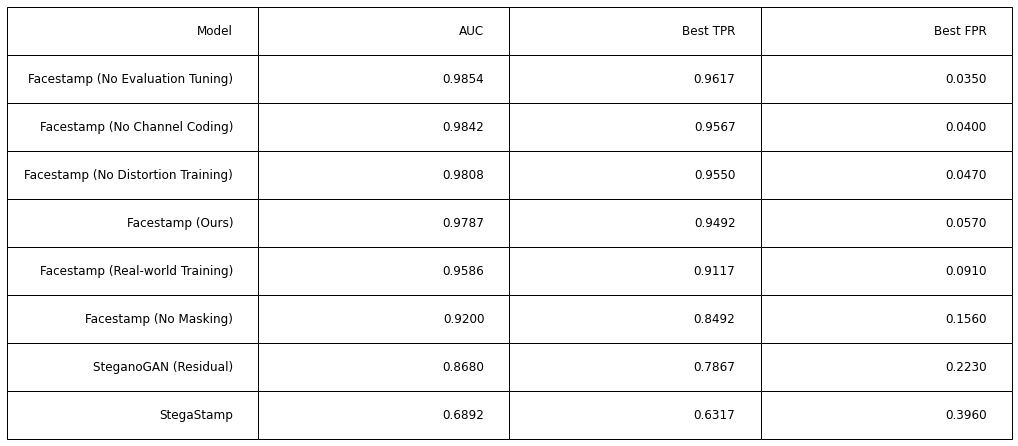

In [8]:
table_data = [['Model','AUC','Best TPR','Best FPR']]

for result in results:
    # preswap_blurred_compressed_match
    preswap = results[result]['preswap_match']
    swap = results[result]['faceswap_swap_match']
    preswap_true = [1 for _ in range(len(preswap))]
    swap_true = [0 for _ in range(len(swap))]
    gt = preswap_true + swap_true
    prob = preswap + swap
    auc = metrics.roc_auc_score(gt, prob)
    preswap_std = np.std(preswap)
    swap_std = np.std(swap)
    name = results[result]['name']
    fpr, tpr, thresholds = metrics.roc_curve(gt, prob)
    (best_fpr, best_tpr) = get_cutoff(fpr, tpr, thresholds)
    best_fpr, best_tpr = best_fpr[0], best_tpr[0]
    table_data.append([name,'%.4f' % auc, '%.4f' % best_tpr, '%.4f' % best_fpr])


table_data.sort(key = lambda table_data: table_data[1], reverse=True)

fig, ax = plt.subplots()


table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(14)
table.scale(3,4)
ax.axis('off')

# plt.figure(figsize=(16,8))
# plt.ylabel('AUC')
# plt.xlabel('Model')
# plt.title(f'AUC Score Graph')
# plt.bar(models, auc_data)
# plt.legend()
plt.savefig(f'results/results_auc.png')
plt.show()

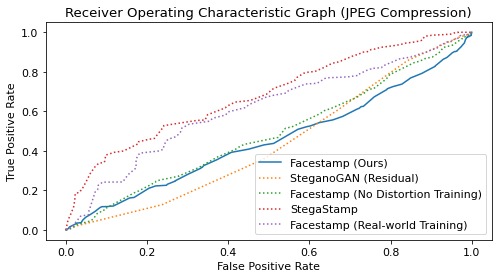

In [13]:

# excludes = ['no_evaluation_tuning', 'no_channel_coding', 'no_mask_residual']
plt.figure(figsize=(8,4))
plt.rcParams.update({'font.size': 11})
for result in results:
    # excluded = False
    # for exclude in excludes:
    #     if(result == exclude):
    #         excluded = True
    # if(excluded):
    #     continue
    try:
        preswap = []
        swap = []
        # categories = ['preswap_match', 'preswap_compressed_match', 'preswap_blurred_compressed_match']
        categories = ['preswap_compressed_match']
        for cat in categories:
            preswap += results[result][cat]
        # categories = ['faceswap_swap_match', 'faceswap_swap_compressed_match', 'faceswap_swap_blurred_compressed_match']
        categories = ['faceswap_swap_compressed_match']
        for cat in categories:
            swap = results[result][cat]
    except:
        continue
    preswap_true = [1 for _ in range(len(preswap))]
    swap_true = [0 for _ in range(len(swap))]
    gt = preswap_true + swap_true
    prob = preswap + swap
    auc = metrics.roc_auc_score(gt, prob)
    fpr, tpr, _ = metrics.roc_curve(gt, prob)
    linestyle = results[result]['linestyle']
    linewidth = 1.5
    name = results[result]['name']
    plt.plot(fpr, tpr, label=f'{name}', linestyle=linestyle)

plt.ylabel('True Positive Rate', )
plt.xlabel('False Positive Rate')
plt.title(f'Receiver Operating Characteristic Graph (JPEG Compression)')
plt.legend()
plt.savefig(f'results/results_roc.png')

plt.show()

In [10]:
names = {
    'main_overtrain': 'Facestamp (Attack Network)',
    'rw_distortion': 'Facestamp (Real-world Training)',
}
for result in results:
    try:
        results[result]['name'] = names[result]
    except:
        continue

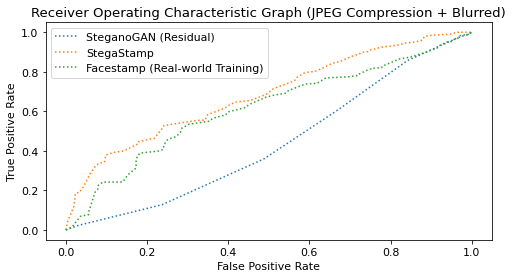

In [11]:
plt.figure(figsize=(8,4))
plt.rcParams.update({'font.size': 11})
for result in results:
    if(result != 'main_overtrain' and result != 'rw_distortion' and result != 'stegastamp' and result != 'steganogan'):
        continue
    try:
        preswap = []
        swap = []
        # categories = ['preswap_match', 'preswap_compressed_match', 'preswap_blurred_compressed_match']
        categories = ['preswap_compressed_match']
        for cat in categories:
            preswap += results[result][cat]
        # categories = ['faceswap_swap_match', 'faceswap_swap_compressed_match', 'faceswap_swap_blurred_compressed_match']
        categories = ['faceswap_swap_compressed_match']
        for cat in categories:
            swap = results[result][cat]
    except:
        continue
    preswap_true = [1 for _ in range(len(preswap))]
    swap_true = [0 for _ in range(len(swap))]
    gt = preswap_true + swap_true
    prob = preswap + swap
    auc = metrics.roc_auc_score(gt, prob)
    fpr, tpr, _ = metrics.roc_curve(gt, prob)
    linestyle = results[result]['linestyle']
    linewidth = 1.5
    name = results[result]['name']
    plt.plot(fpr, tpr, label=f'{name}', linestyle=linestyle)

plt.ylabel('True Positive Rate', )
plt.xlabel('False Positive Rate')
plt.title(f'Receiver Operating Characteristic Graph (JPEG Compression + Blurred)')
plt.legend()
plt.savefig(f'results/results_roc.png')

plt.show()

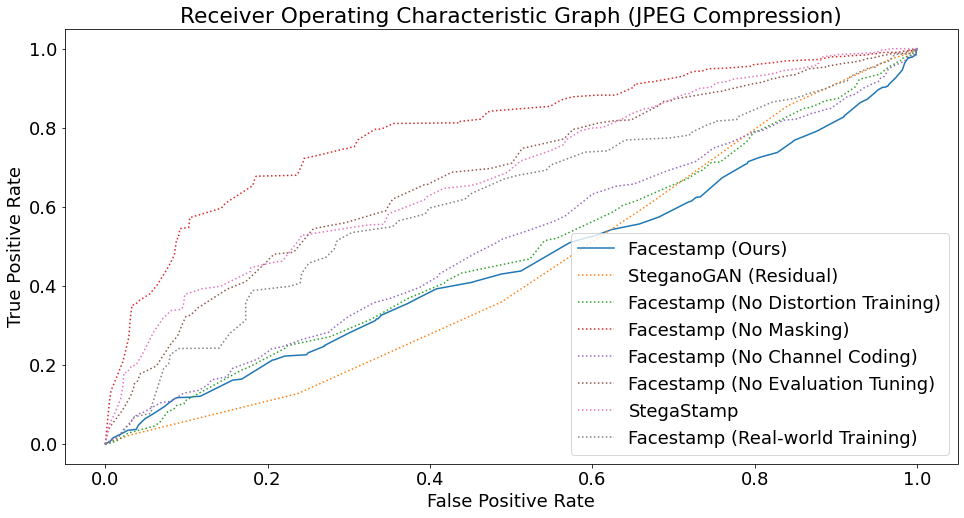

In [15]:
plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size': 18})
for result in results:
    try:
        preswap = []
        swap = []
        # categories = ['preswap_match', 'preswap_compressed_match', 'preswap_blurred_compressed_match']
        categories = ['preswap_compressed_match']
        for cat in categories:
            preswap += results[result][cat]
        # categories = ['faceswap_swap_match', 'faceswap_swap_compressed_match', 'faceswap_swap_blurred_compressed_match']
        categories = ['faceswap_swap_compressed_match']
        for cat in categories:
            swap = results[result][cat]
    except:
        continue
    preswap_true = [1 for _ in range(len(preswap))]
    swap_true = [0 for _ in range(len(swap))]
    gt = preswap_true + swap_true
    prob = preswap + swap
    auc = metrics.roc_auc_score(gt, prob)
    fpr, tpr, _ = metrics.roc_curve(gt, prob)
    linestyle = results[result]['linestyle']
    linewidth = 1.5
    name = results[result]['name']
    plt.plot(fpr, tpr, label=f'{name}', linestyle=linestyle)

plt.ylabel('True Positive Rate', )
plt.xlabel('False Positive Rate')
plt.title(f'Receiver Operating Characteristic Graph (JPEG Compression)')
plt.legend()
plt.savefig(f'results/results_roc.png')

plt.show()